In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

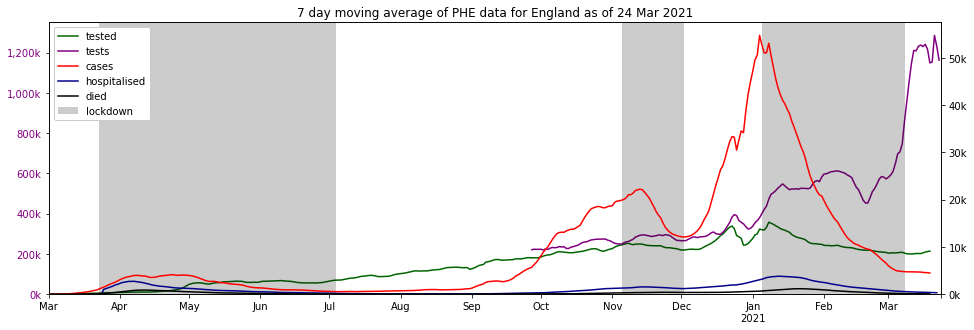

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

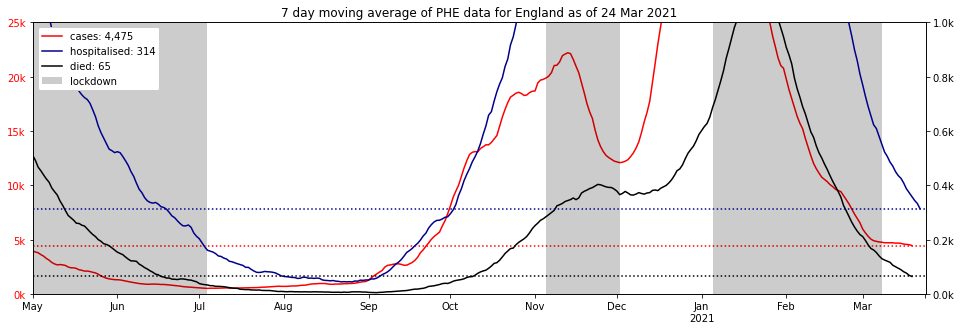

In [3]:
plot_summary(earliest_date='2020-05-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

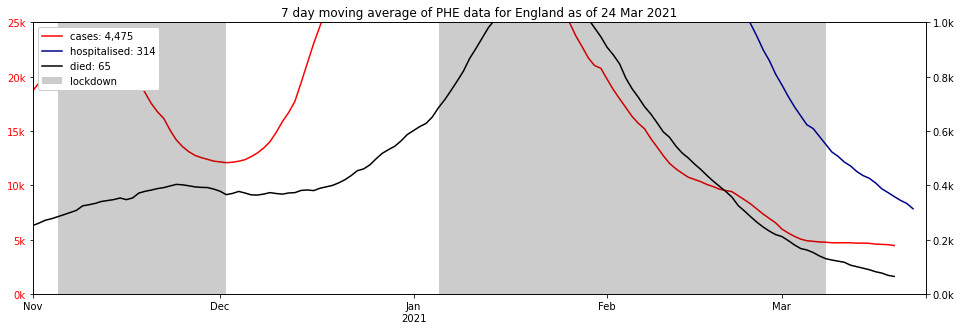

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=25_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter, right_ymax=1_000)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,1820530.0,24406074.0,22585544.0,56286961,3.234373,40.125712,56.639915
1,Northern Ireland,N92000002,96254.0,694863.0,598609.0,1893667,5.082942,31.611102,63.305956
2,Scotland,S92000003,249252.0,2249612.0,2000360.0,5463300,4.562298,36.614500,58.823202
3,Wales,W92000004,366803.0,1302974.0,936171.0,3152879,11.633907,29.692576,58.673517


'partial: 28,653,523 (42.9%), full: 2,532,839'

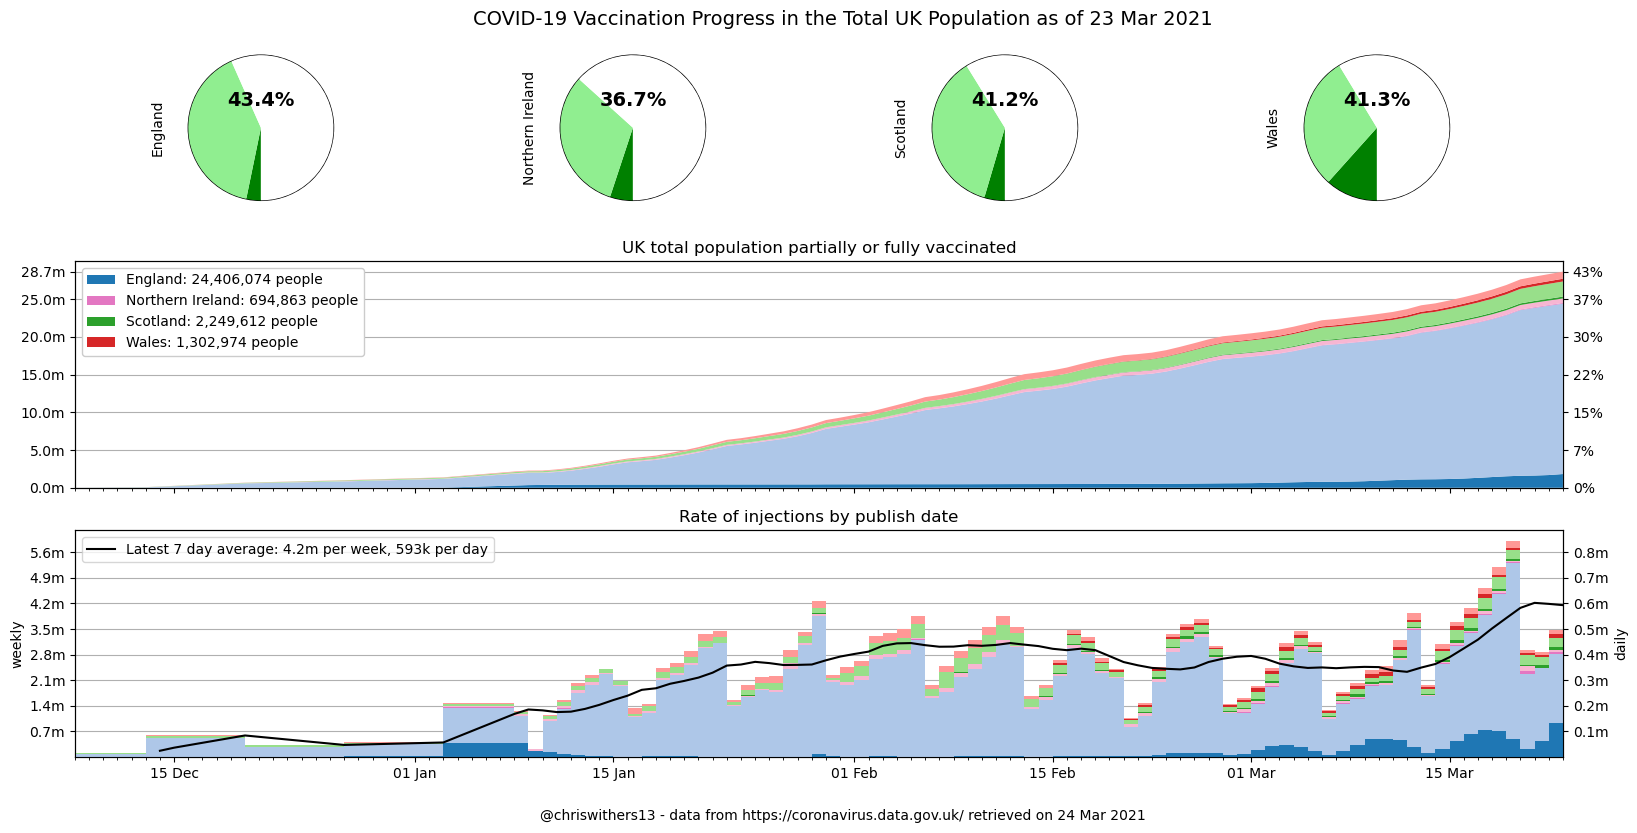

In [5]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [6]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,23 Mar 21,"+268,651","+134,547","+134,547","+24,406,074","+1,820,530","+1,820,530"
Northern Ireland,23 Mar 21,"+7,335","+7,571","+7,571","+694,863","+96,254","+96,254"
Scotland,23 Mar 21,"+34,940","+13,581","+13,581","+2,249,612","+249,252","+249,252"
Wales,23 Mar 21,"+14,724","+13,456","+13,456","+1,302,974","+366,803","+366,803"


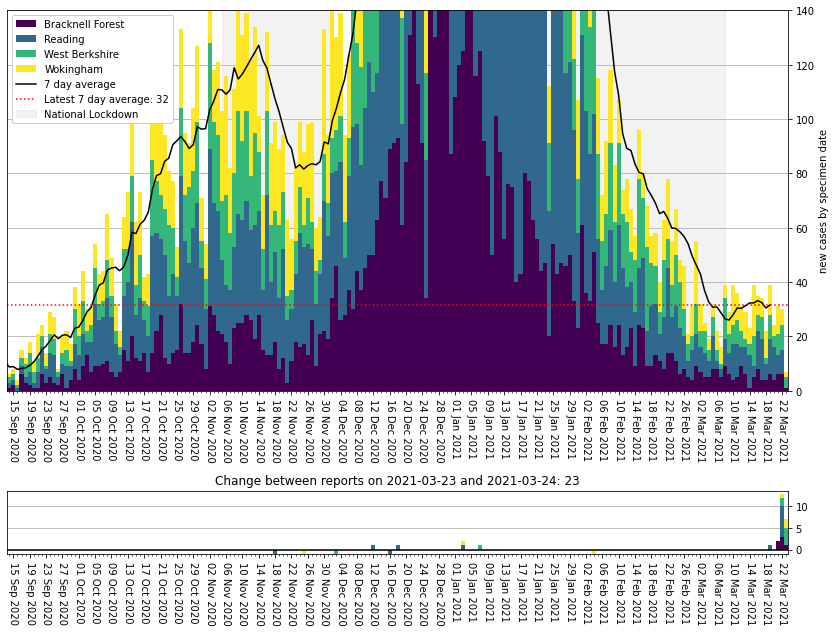

In [7]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

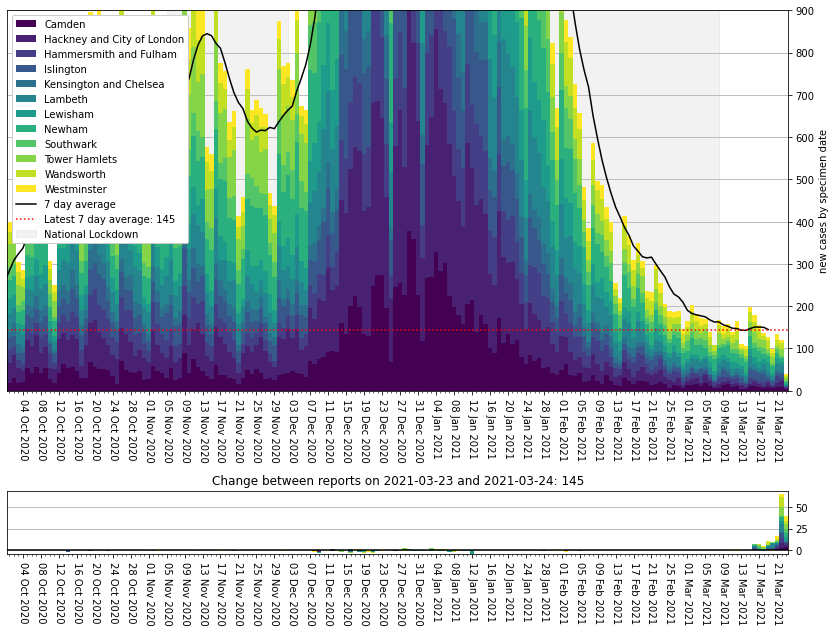

In [8]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [9]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [10]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000150,Corby,191.088094,138.0,2021-03-23
S12000040,West Lothian,168.760240,309.0,2021-03-23
E06000013,North Lincolnshire,148.004550,255.0,2021-03-23
E08000016,Barnsley,139.346852,344.0,2021-03-23
E08000018,Rotherham,134.131592,356.0,2021-03-23
E08000032,Bradford,130.609734,705.0,2021-03-23
E08000017,Doncaster,127.288467,397.0,2021-03-23
E06000010,"Kingston upon Hull, City of",125.106822,325.0,2021-03-23
E07000236,Redditch,124.324134,106.0,2021-03-23


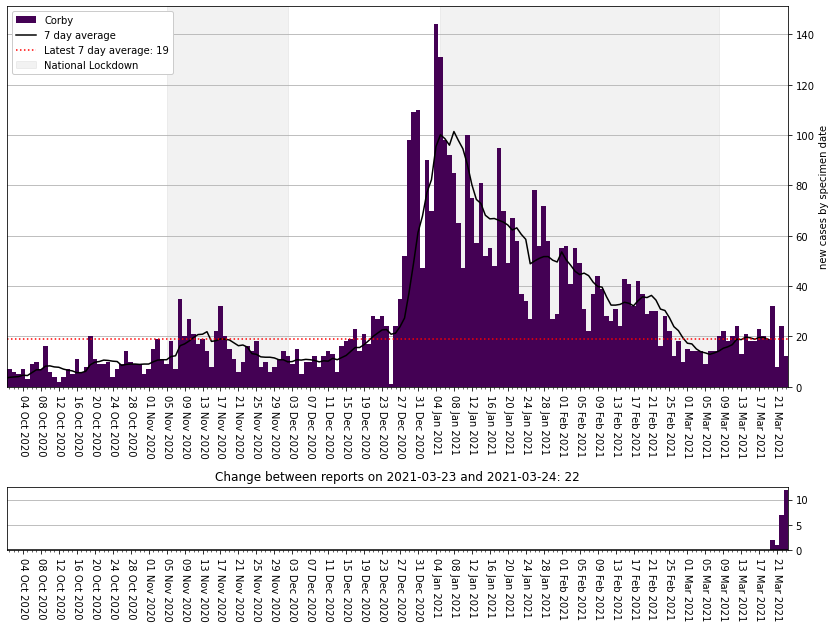

In [11]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [12]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,95.695710,759.0,2021-03-23
E08000025,Birmingham,62.619546,715.0,2021-03-23
E08000032,Bradford,130.609734,705.0,2021-03-23
E08000019,Sheffield,111.651988,653.0,2021-03-23
S12000049,Glasgow City,95.558504,605.0,2021-03-23
E08000036,Wakefield,124.026735,432.0,2021-03-23
E08000003,Manchester,73.979213,409.0,2021-03-23
E08000034,Kirklees,91.180503,401.0,2021-03-23
E08000017,Doncaster,127.288467,397.0,2021-03-23


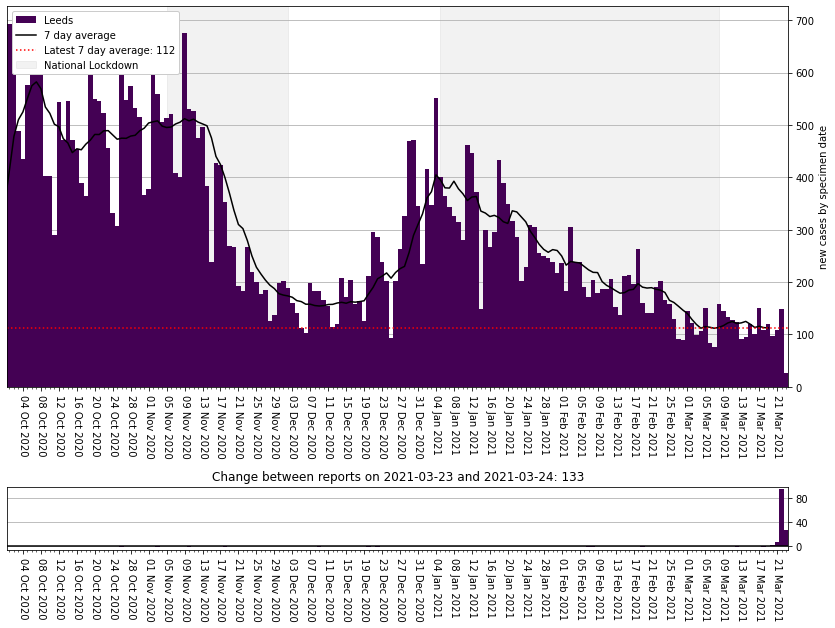

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

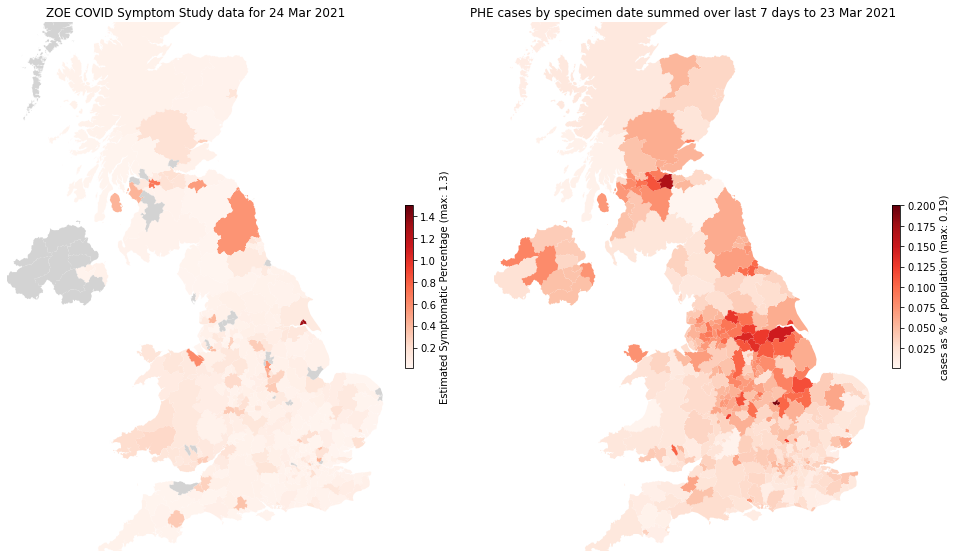

In [15]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [16]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

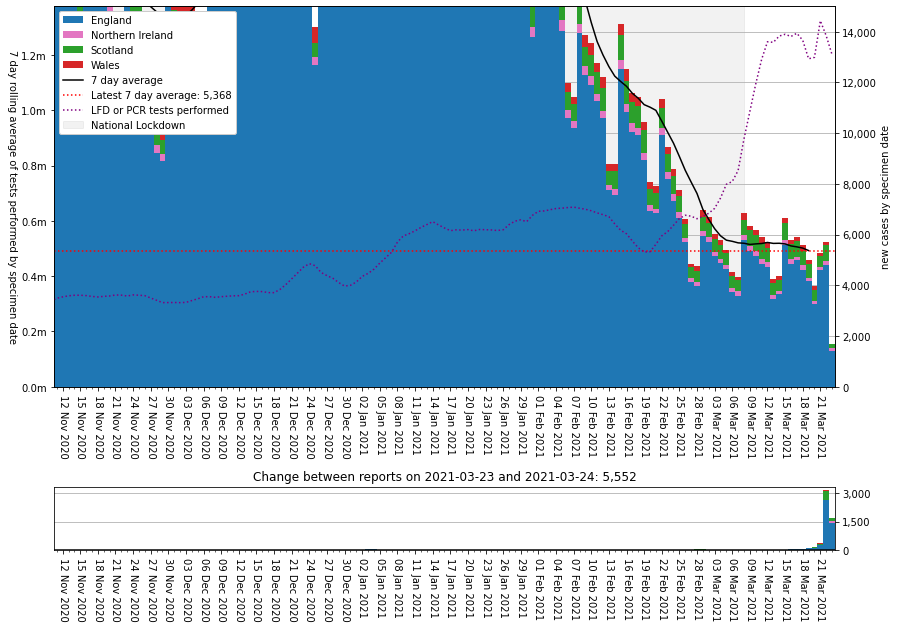

In [17]:
plot_areas(for_date, 'cases_nations', ylim=15_000, earliest='2020-11-11')